In [1]:
import numpy as np
import matplotlib.pyplot as plt
from pearc19_model import pop_dyn

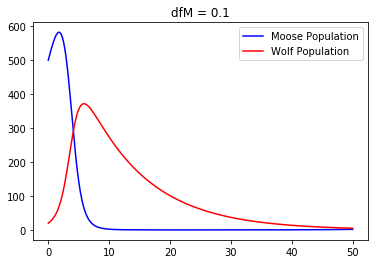

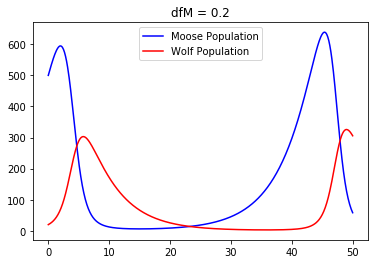

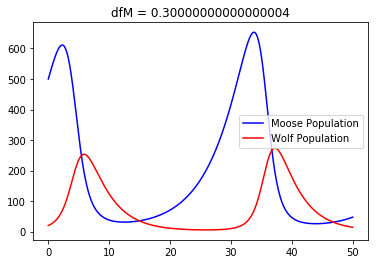

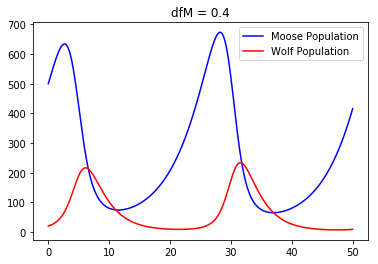

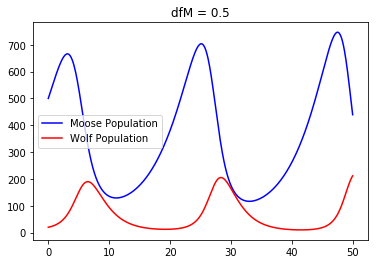

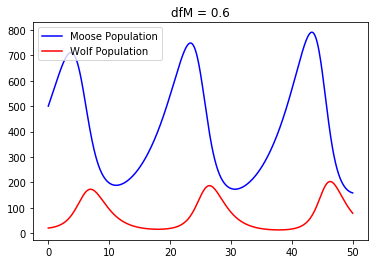

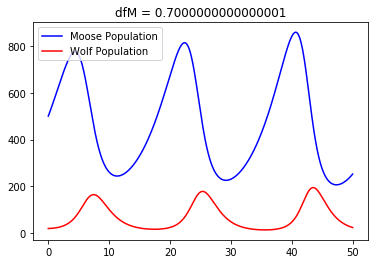

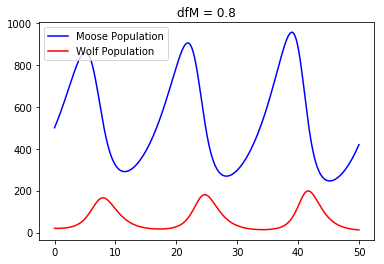

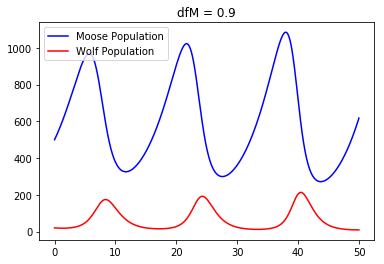

In [2]:
for i in np.arange(0.1, 0.91, 0.1):
    t,M,W = pop_dyn(dfW=i, brW=.0015)
    
    
    plt.figure()
    plt.title('dfM = '+ str(i))
    # Plot the moose population
    plt.plot(t, M, color = "b", label = "Moose Population")
    plt.plot(t, W, color = "r", label = "Wolf Population")
    
    plt.legend()
    plt.show()
    